## sklearn.matrics confusion_matrix

The confusion matrix is often used in machine learning to compute the accuracy of a classification algorithm. It can be used in bianry (two) classification as well as multi class classification problem.
It is a visual representation of the performance of a machine learning model. 

Confusion Matrix summarize the predicted and actual values of the classification model to identify "misclassification". The confusion matrix help data scientist to fine-tune their models and improve their performance.

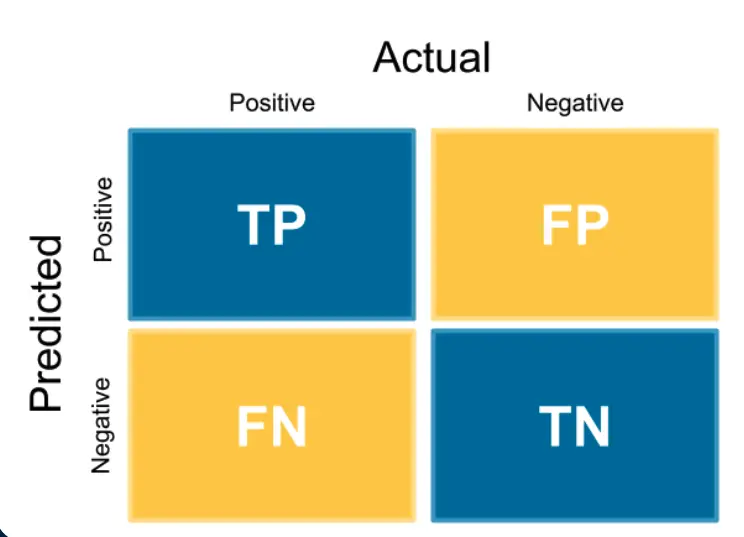

Confusion Matrix qualify of prediction from classification model by looking at how many predictions are True and how many are False.

It computes: 
1. True positive 
2. True negative
3. False positive
4. False negative

In [6]:
# classify the breast cancer using KNN algorithm
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
 
# split taining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
 
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)

0.9239766081871345

In [7]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm
# true positive = 106
# false positive = 1
# false negative = 12
# true negative = 52

array([[106,   1],
       [ 12,  52]], dtype=int64)

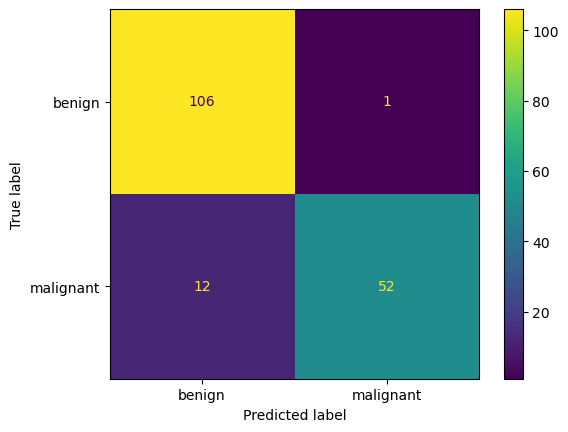

In [13]:
# plot confusion matrix in skikit learn

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
color = 'coolwarm'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()